<a href="https://colab.research.google.com/github/AlanKopiler/alura/blob/main/Aula_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)


##**Desafio** **1** 

RandomForestRegressor| mse: 5787.48 ; r2 0.52
DecisionTreeRegressor| mse: 11383.87 ; r2 0.056
LinearRegression| mse: 5961.37 ; r2 0.506
ElasticNet| mse: 5961.36 ; r2 0.506
BayesianRidge| mse: 5961.37 ; r2 0.506
Ridge| mse: 5961.37 ; r2 0.506


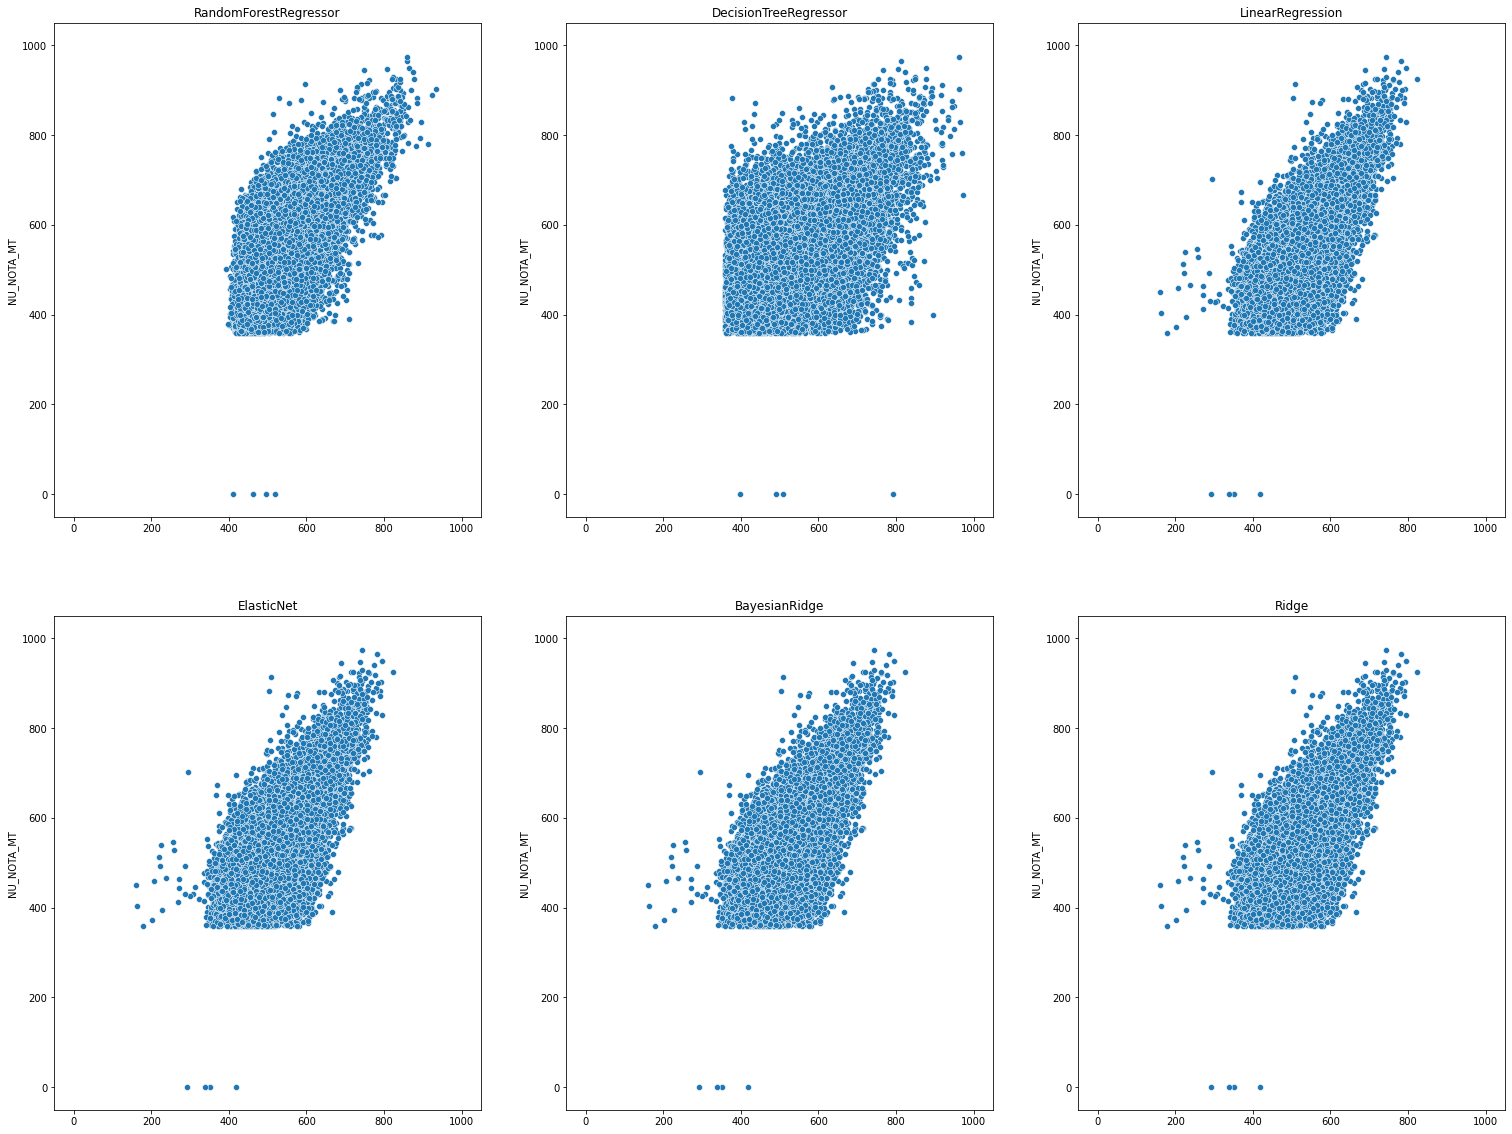

In [12]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
#Linear
reg = sklearn.linear_model.LinearRegression()
eln = sklearn.linear_model.ElasticNet()
bsr = sklearn.linear_model.BayesianRidge()
lsr = sklearn.linear_model.Ridge()

cla=(rfr, dtr, reg, eln, bsr, lsr)
fig, axes = plt.subplots(2,3, figsize=(26, 20))
count = 0
pred = 0
i = 0
j = 0
for clf in cla:
    if i > 2 and j==0:
      j+=1
      i=0
    nome = clf.__class__.__name__
    count += 1
    abse=sqe=r2=0
 
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)
    if i == 0 and j == 0:
      dadosteste = pd.DataFrame()
      dadosteste["NU_NOTA_CH"] = x_teste["NU_NOTA_CH"]
      dadosteste["NU_NOTA_LC"] = x_teste["NU_NOTA_LC"]
      dadosteste["NU_NOTA_CN"] =x_teste["NU_NOTA_CN"]
      dadosteste["NU_NOTA_REDACAO"] = x_teste["NU_NOTA_REDACAO"]
      dadosteste["NU_NOTA_MT"] = y_teste

    clf = clf.fit(x_treino ,y_treino)
    
    predict = clf.predict(x_teste)

    r2 = r2_score(y_teste, predict)
    mse = mean_squared_error(y_teste, predict)
    print(nome+"| mse: "+str(np.around(mse,2))+" ; r2 "+str(np.around(r2,3)))
    dadosteste[nome] = predict

    sns.scatterplot(ax = axes[j][i],x=predict, y=y_teste)
    axes[j][i].set_xlim((-50, 1050))
    axes[j][i].set_ylim((-50, 1050))
    axes[j][i].set_title(nome)

    i += 1


## **Desafio** **2**

In [20]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor(strategy="mean")
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

print("mean: "+str(np.around(mean_squared_error(y_teste, dummy_predicoes),2)))

modelo_dummy = DummyRegressor(strategy="median")
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

print("median: "+str(np.around(mean_squared_error(y_teste, dummy_predicoes),2)))



mean: 12063.65
median: 12599.97


## **Deafio 3**

In [16]:
from sklearn.metrics import max_error

max_error(y_teste, dummy_predicoes)

501.55